In [1]:
import glob
import os
import pandas as pd
import numpy as np
import tqdm

In [2]:
df = pd.DataFrame(columns=['image_path', 'image_formate', 'image_name', 'image_lable'])
dataset_folder_path = os.path.join('..', 'Dataset', 'dataset1')

for image in glob.glob(os.path.join(dataset_folder_path, '*', '*')):
#     print(image.split('\\')[-1].split('.')[-1])
    image_path = image
    image_formate = image.split('\\')[-1].split('.')[-1]
    image_name = image.split('\\')[-1]
    image_folder = image.split('\\')[-2]
    
    data = {
        'image_path': image_path, 
        'image_formate': image_formate, 
        'image_name': image_name, 
        'image_lable': image_folder
    }
    df.loc[len(df)] = data

#     break

display(df)

,image_path,image_formate,image_name,image_lable
0,..\Dataset\dataset1\lymph_cll\lymph_cll_0001.jpg,jpg,lymph_cll_0001.jpg,lymph_cll
1,..\Dataset\dataset1\lymph_cll\lymph_cll_0002.jpg,jpg,lymph_cll_0002.jpg,lymph_cll
2,..\Dataset\dataset1\lymph_cll\lymph_cll_0003.jpg,jpg,lymph_cll_0003.jpg,lymph_cll
3,..\Dataset\dataset1\lymph_cll\lymph_cll_0004.jpg,jpg,lymph_cll_0004.jpg,lymph_cll
4,..\Dataset\dataset1\lymph_cll\lymph_cll_0005.jpg,jpg,lymph_cll_0005.jpg,lymph_cll
...,...,...,...,...
14995,..\Dataset\dataset1\lymph_mcl\lymph_mcl_4996.jpg,jpg,lymph_mcl_4996.jpg,lymph_mcl
14996,..\Dataset\dataset1\lymph_mcl\lymph_mcl_4997.jpg,jpg,lymph_mcl_4997.jpg,lymph_mcl
14997,..\Dataset\dataset1\lymph_mcl\lymph_mcl_4998.jpg,jpg,lymph_mcl_4998.jpg,lymph_mcl
14998,..\Dataset\dataset1\lymph_mcl\lymph_mcl_4999.jpg,jpg,lymph_mcl_4999.jpg,lymph_mcl


### Links

[LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

[LabelEncoder](https://www.analyticsvidhya.com/blog/2023/07/label-encoding-in-python/)

[LabelEncoder](https://www.geeksforgeeks.org/ml-label-encoding-of-datasets-in-python/)


In [3]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['class']= label_encoder.fit_transform(df['image_lable']) 
display(df)

,image_path,image_formate,image_name,image_lable,class
0,..\Dataset\dataset1\lymph_cll\lymph_cll_0001.jpg,jpg,lymph_cll_0001.jpg,lymph_cll,0
1,..\Dataset\dataset1\lymph_cll\lymph_cll_0002.jpg,jpg,lymph_cll_0002.jpg,lymph_cll,0
2,..\Dataset\dataset1\lymph_cll\lymph_cll_0003.jpg,jpg,lymph_cll_0003.jpg,lymph_cll,0
3,..\Dataset\dataset1\lymph_cll\lymph_cll_0004.jpg,jpg,lymph_cll_0004.jpg,lymph_cll,0
4,..\Dataset\dataset1\lymph_cll\lymph_cll_0005.jpg,jpg,lymph_cll_0005.jpg,lymph_cll,0
...,...,...,...,...,...
14995,..\Dataset\dataset1\lymph_mcl\lymph_mcl_4996.jpg,jpg,lymph_mcl_4996.jpg,lymph_mcl,2
14996,..\Dataset\dataset1\lymph_mcl\lymph_mcl_4997.jpg,jpg,lymph_mcl_4997.jpg,lymph_mcl,2
14997,..\Dataset\dataset1\lymph_mcl\lymph_mcl_4998.jpg,jpg,lymph_mcl_4998.jpg,lymph_mcl,2
14998,..\Dataset\dataset1\lymph_mcl\lymph_mcl_4999.jpg,jpg,lymph_mcl_4999.jpg,lymph_mcl,2


In [4]:
data_file = os.path.join('..', 'Dataset', 'dataset1_label_and_classes.csv')
df.to_csv(data_file, index=False)

### Split dataset

In [5]:
df = pd.read_csv(data_file)
df.head()

,image_path,image_formate,image_name,image_lable,class
0,..\Dataset\dataset1\lymph_cll\lymph_cll_0001.jpg,jpg,lymph_cll_0001.jpg,lymph_cll,0
1,..\Dataset\dataset1\lymph_cll\lymph_cll_0002.jpg,jpg,lymph_cll_0002.jpg,lymph_cll,0
2,..\Dataset\dataset1\lymph_cll\lymph_cll_0003.jpg,jpg,lymph_cll_0003.jpg,lymph_cll,0
3,..\Dataset\dataset1\lymph_cll\lymph_cll_0004.jpg,jpg,lymph_cll_0004.jpg,lymph_cll,0
4,..\Dataset\dataset1\lymph_cll\lymph_cll_0005.jpg,jpg,lymph_cll_0005.jpg,lymph_cll,0


In [6]:
df['class'].unique(), len(df['class'].unique())

(array([0, 1, 2], dtype=int64), 3)

In [7]:
df['class'].value_counts()

class
0    5000
1    5000
2    5000
Name: count, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

train_val, test = train_test_split(df, 
                                   random_state = 104, 
                                   test_size = 0.4,
                                   stratify = df["class"],
                                   shuffle = True)

In [21]:
train_val.shape, test.shape

((9000, 5), (6000, 5))

In [22]:
test['class'].unique(), len(test['class'].unique())

(array([0, 1, 2], dtype=int64), 3)

In [23]:
test['class'].value_counts()

class
0    2000
1    2000
2    2000
Name: count, dtype: int64

In [24]:
train_val['class'].unique(), len(train_val['class'].unique())

(array([2, 1, 0], dtype=int64), 3)

In [25]:
train_val['class'].value_counts()

class
2    3000
1    3000
0    3000
Name: count, dtype: int64

In [26]:
train_val_data_file = os.path.join('..', 'Dataset', 'train_val_data_dataset1_label_and_classes.csv')
train_val.to_csv(train_val_data_file, index=False)

test_data_file = os.path.join('..', 'Dataset', 'test_data_dataset1_label_and_classes.csv')
test.to_csv(test_data_file, index=False)

In [27]:
train_val = pd.read_csv(train_val_data_file)
X, y = train_val.drop('class',axis=1), train_val['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=104, shuffle=True, stratify=y)

In [28]:
X_train.shape, X_test.shape

((5400, 4), (3600, 4))

<Axes: xlabel='image_lable'>

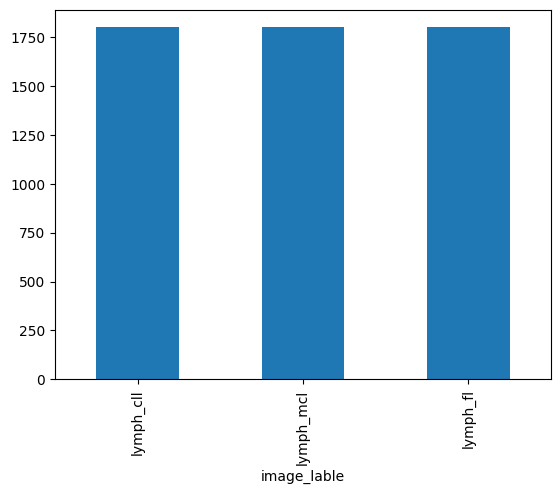

In [29]:
X_train['image_lable'].value_counts()[:].plot(kind='bar')

In [30]:
X_train['image_lable'].value_counts()

image_lable
lymph_cll    1800
lymph_mcl    1800
lymph_fl     1800
Name: count, dtype: int64

<Axes: xlabel='image_lable'>

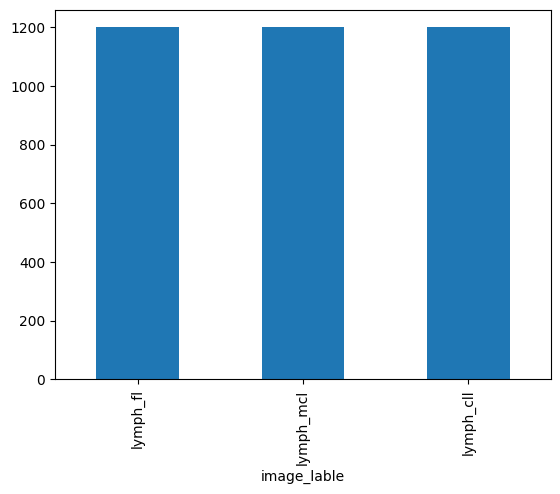

In [31]:
X_test['image_lable'].value_counts()[:].plot(kind='bar')

In [32]:
X_test['image_lable'].value_counts()

image_lable
lymph_fl     1200
lymph_mcl    1200
lymph_cll    1200
Name: count, dtype: int64

In [33]:
training_data = pd.concat([X_train, y_train], axis=1)
training_data_file = os.path.join('..', 'Dataset', 'training_data_dataset1_label_and_classes.csv')
training_data.to_csv(training_data_file, index=False)

testing_data = pd.concat([X_test, y_test], axis=1)
testing_data_file = os.path.join('..', 'Dataset', 'testing_data_dataset1_label_and_classes.csv')
testing_data.to_csv(testing_data_file, index=False)


### Move Images

In [34]:
training_data_file = os.path.join('..', 'Dataset', 'test_data_dataset1_label_and_classes.csv')
data = pd.read_csv(training_data_file)
data.head()

,image_path,image_formate,image_name,image_lable,class
0,..\Dataset\dataset1\lymph_cll\lymph_cll_3986.jpg,jpg,lymph_cll_3986.jpg,lymph_cll,0
1,..\Dataset\dataset1\lymph_fl\lymph_fl_3375.jpg,jpg,lymph_fl_3375.jpg,lymph_fl,1
2,..\Dataset\dataset1\lymph_cll\lymph_cll_3232.jpg,jpg,lymph_cll_3232.jpg,lymph_cll,0
3,..\Dataset\dataset1\lymph_fl\lymph_fl_2002.jpg,jpg,lymph_fl_2002.jpg,lymph_fl,1
4,..\Dataset\dataset1\lymph_fl\lymph_fl_4204.jpg,jpg,lymph_fl_4204.jpg,lymph_fl,1


In [36]:
from sklearn.model_selection import train_test_split

train_val, test = train_test_split(data, random_state=104, test_size=0.2, shuffle=True, stratify=data['class'])

print(train_val.shape, test.shape)

training_data, testing_data = train_test_split(train_val, random_state=104, 
                                               test_size=0.33, shuffle=True, 
                                               stratify=train_val['class'])

print(training_data.shape, testing_data.shape)

(4800, 5) (1200, 5)
(3216, 5) (1584, 5)


In [37]:
import shutil 

train_folder_name =  os.path.join('..', 'Dataset', 'data', 'train')
os.makedirs(train_folder_name, exist_ok=True) 

for index, row in training_data.iterrows():
    os.makedirs(os.path.join(train_folder_name, str(row['class'])), exist_ok=True) 

    source = row['image_path']
    destination = os.path.join(train_folder_name, str(row['class']), row['image_name'])
    shutil.copy2(source, destination) 
    
#     break

In [38]:
test_folder_name =  os.path.join('..', 'Dataset', 'data', 'test')
os.makedirs(test_folder_name, exist_ok=True) 

for index, row in testing_data.iterrows():
    os.makedirs(os.path.join(test_folder_name, str(row['class'])), exist_ok=True) 
    
    source = row['image_path']
    destination = os.path.join(test_folder_name, str(row['class']), row['image_name'])
    shutil.copy2(source, destination) 
    
#     break

In [39]:
test_data = test.copy() # pd.read_csv(test_data_file)

val_folder_name =  os.path.join('..', 'Dataset', 'data', 'val')
os.makedirs(val_folder_name, exist_ok=True) 

for index, row in test_data.iterrows():
    os.makedirs(os.path.join(val_folder_name, str(row['class'])), exist_ok=True) 
    
    source = row['image_path']
    destination = os.path.join(val_folder_name, str(row['class']), row['image_name'])
    shutil.copy2(source, destination) 
    
#     break